## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Выполнил Кузнецов Вадим 

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Пропущенные отсутствуют

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

### Все признаки являются численными 

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [10]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
normalizer = StandardScaler()
Xf_train = normalizer.fit_transform(X_train[['alcohol', 'magnesium']])
Xf_test = normalizer.transform(X_test[['alcohol', 'magnesium']])

In [12]:
pd.DataFrame(Xf_train)

,0,1
0,0.198035,-0.124172
1,0.838310,0.423288
2,0.888527,-0.534767
3,1.064289,2.202532
4,-0.869088,-0.534767
...,...,...
119,1.830107,0.902315
120,-0.065607,1.518208
121,-0.505011,-1.013794
122,0.323579,-0.466334


In [946]:
print('NN\tTrain\t\t\tTest')

n_neighbors = [1,3,5,10,15,25]

clsf = {}
clfs = []

for i in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    clf.fit(Xf_train, y_train)
    clfs.append(clf)
    y_predictedTest = clf.predict(Xf_test)
    y_predictedtTrain = clf.predict(Xf_train)
    clsf[i] = (y_predictedTest, y_predictedtTrain)
    print(i,'\t',np.mean(y_train == y_predictedtTrain),'\t', np.mean(y_test == y_predictedTest))
    


NN	Train			Test
1 	 0.9919354838709677 	 0.6666666666666666
3 	 0.7983870967741935 	 0.6481481481481481
5 	 0.7983870967741935 	 0.6666666666666666
10 	 0.8064516129032258 	 0.7037037037037037
15 	 0.7983870967741935 	 0.6481481481481481
25 	 0.7419354838709677 	 0.5925925925925926


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [947]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [948]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [949]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

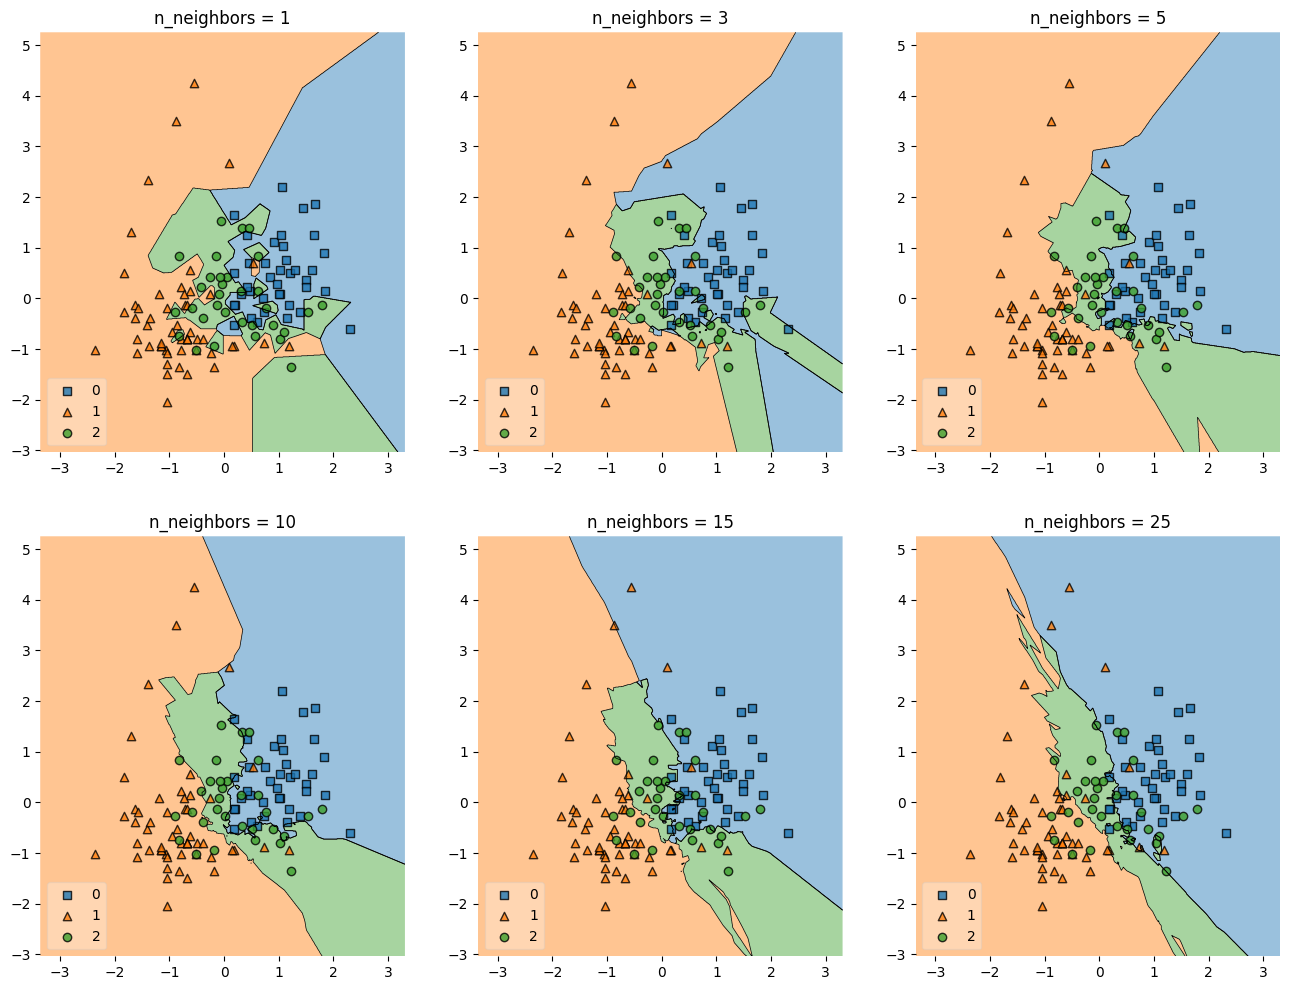

In [950]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(16,12))
for clf, countN, grd in zip(clfs, 
                           n_neighbors,
                           itertools.product([0, 1, 2], repeat = 2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xf_train, y=y_train, clf=clf, legend=3)
    plt.title('n_neighbors = ' + str(countN))
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

### Наиболее оптимальным будет использовать 10 ближайших соседей. Это видно исходя из подбора k соседей. Наибольшая точность достигается и в тестовой и в тренировочной выборке при k = 10.  ###

Что касается визуала поверхности, стоит обратить внимание на тот факт, очень много соседей расположены по отношению друг к другу очень близко. Тогда следует смотреть на большее число соседей, нежели чем 1 или 3. У 15 и 25 тоже больше ошибок. Поэтому визуально самые оптимальными решениями будут 5 или 10 соседей.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

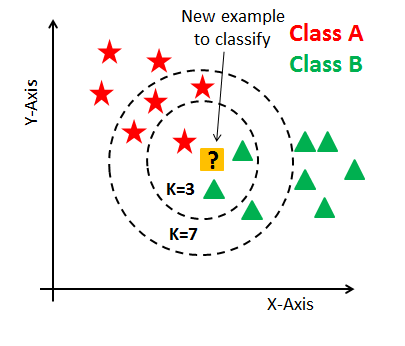

In [951]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.Xtr = X
        self.Ytr = y
    
    def predict(self, X):
        dists = np.sum((X[:, None, :] - self.Xtr) ** 2, axis = 2)
        nearest = np.argsort(dists)[:, :self.k]
        nearest_labels = self.Ytr[nearest]
        return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=1, arr=nearest_labels)
        

In [952]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [953]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [954]:
data = pd.read_csv('https://raw.githubusercontent.com/olvad/MachineLearning2023/main/HWs/HW4/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [955]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропущенных нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [956]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [957]:
data.shape

(53940, 10)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [958]:
cat_features_mask = (data.dtypes == "object").values
dataNCat = data[data.columns[~cat_features_mask]]
dataNCat

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [959]:
need_in_next = np.array(data.columns[~cat_features_mask])

In [960]:
result = np.where(need_in_next == 'price')
need_in_next = np.delete(need_in_next, int(result[0]))
need_in_next

array(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype=object)

In [961]:
import seaborn as sns

<AxesSubplot: >

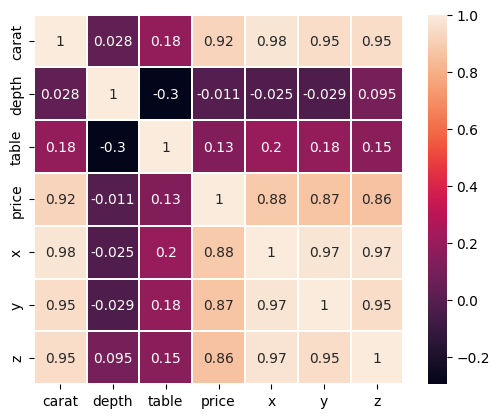

In [962]:
sns.heatmap(dataNCat.corr(),linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white', annot=True)

Больше всего коррелирует "carat", после чего примерно одинаково коррелируют x,y,z - размеры бриллианта 

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [963]:
datad = pd.get_dummies(data.copy(), drop_first=True)
datad

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [964]:
y = datad['price']
X = datad.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [965]:
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32357,0.30,63.1,56.0,4.25,4.28,2.69,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36705,0.46,62.3,59.0,4.95,4.91,3.07,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
35379,0.41,61.9,58.0,4.75,4.78,2.95,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
23169,1.23,61.2,56.0,6.94,6.90,4.23,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
45644,0.25,62.1,56.0,4.02,4.05,2.50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48417,0.70,62.4,58.0,5.62,5.67,3.52,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
22637,2.00,60.3,56.0,8.27,8.16,4.94,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
42891,0.51,62.8,57.0,5.12,5.10,3.21,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
38368,0.53,63.8,57.0,5.10,5.12,3.26,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [966]:
num = list(need_in_next)

In [967]:
binary = [i for i in X_train.columns if i not in num]
binary

['cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [968]:
scaler = StandardScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

X_train = pd.concat([X_train[num], X_train[binary]], axis=1)
X_test = pd.concat([X_test[num], X_test[binary]], axis=1)

X_train = np.array(X_train)
X_test = np.array(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [969]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [970]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yPred = lr.predict(X_train)
mean_squared_error(yPred, y_train)

1271379.7244977034

In [971]:
NDFT = lr.predict(X_test) # Для тестовой (понадобится в задании ниже)
errorCLR = mean_squared_error(y_test, NDFT)
errorCLR

1289816.4038534847

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [972]:
cfs = pd.DataFrame(lr.coef_)
cfs['priznaks'] = X.columns
cfs

,0,priznaks
0,5326.294925,carat
1,-85.423182,depth
2,-50.830813,table
3,-1108.168218,x
4,18.046312,y
5,-60.401544,z
6,573.052115,cut_Good
7,842.499204,cut_Ideal
8,766.873387,cut_Premium
9,735.523301,cut_Very Good


Cущественно превышают такие вещественные переменные, как "carat" и "x"

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [973]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [974]:
lass = Lasso(alpha=10)
lass.fit(X_train, y_train)
y_lasso_sdelal = lass.predict(X_train)

In [975]:
ls = pd.DataFrame(lass.coef_)
ls['priznaks'] = X.columns
ls

,0,priznaks
0,4736.822929,carat
1,-149.529999,depth
2,-95.882792,table
3,-693.052119,x
4,-0.000000,y
5,-0.000000,z
6,-0.000000,cut_Good
7,187.272193,cut_Ideal
8,92.154987,cut_Premium
9,106.090553,cut_Very Good


Веса сильно уменьшились (некоторые занулились),однако carat имеет все такой же немаленький вес относительно других признаков. Соответственно, проблема умеренно проявлалась.

In [976]:
rig = Ridge(alpha=10)
rig.fit(X_train, y_train)
y_rig_sdelal = rig.predict(X_train)
print(((y_train - y_rig_sdelal) ** 2).mean())

1275574.576027521


In [977]:
rg = pd.DataFrame(rig.coef_)
rg['priznaks'] = X.columns
rg

,0,priznaks
0,5272.820320,carat
1,-88.203605,depth
2,-53.267423,table
3,-1069.842325,x
4,17.915095,y
5,-58.428988,z
6,597.586124,cut_Good
7,872.374374,cut_Ideal
8,793.343425,cut_Premium
9,767.423347,cut_Very Good


Проблема умеренно проявлялась, все-таки самый большой вес остался большим. Остальные сильно уменьшились.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [978]:
Lassos = {}
Ridges = {}
alphas = [0.1, 1, 10, 100, 200]
for a in alphas:
    lr = Lasso(alpha=a)
    rc = Ridge(alpha=a)
    lr.fit(X_train, y_train)
    rc.fit(X_train, y_train)
    Lassos[a] = lr.coef_
    Ridges[a] = rc.coef_

In [979]:
lasss = []
riggg = []

In [980]:
for i in Lassos.items():
    lasss.append(np.linalg.norm(i[1]))
for j in Ridges.items():
    riggg.append(np.linalg.norm(j[1]))

In [981]:
l = np.array(lasss)
r = np.array(riggg)

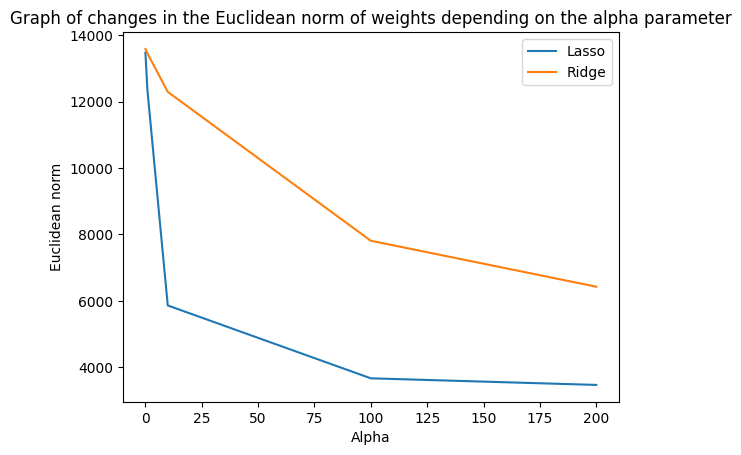

In [982]:
import matplotlib.pyplot as plt

plt.plot(alphas, l)
plt.plot(alphas, r)
plt.title('Graph of changes in the Euclidean norm of weights depending on the alpha parameter')
plt.xlabel('Alpha')
plt.ylabel('Euclidean norm')
plt.legend(['Lasso', 'Ridge'])

Lasso агрессивнее уменьшает веса. Более того, некоторые признаки она зануляет, поэтому можем сделать вывод о том, что те веса, которые занулены, не так важны

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [983]:
from sklearn.linear_model import LassoCV


lcv = LassoCV(alphas=alphas, cv=5)
lcv.fit(X_train, y_train)
msess = lcv.mse_path_.mean(axis = 1)
alps = lcv.alphas_
(msess, alps)

(array([2438999.69597158, 2231722.54906465, 1511813.26521852,
        1279314.26878416, 1275754.64187644]),
 array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01]))

In [984]:
ms = pd.DataFrame(msess)
ms['alphas'] = np.array(lcv.alphas_)
ms

,0,alphas
0,2.439000e+06,200.0
1,2.231723e+06,100.0
2,1.511813e+06,10.0
3,1.279314e+06,1.0
4,1.275755e+06,0.1


In [985]:
ms[ms[0] == ms[0].min()].alphas

4    0.1
Name: alphas, dtype: float64

Cамое лучшее, когда alpha равно 0.1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [986]:
L11 = Lasso(alpha=0.1)
L11.fit(X_train, y_train)

Lasso(alpha=0.1)

In [987]:
l2 = pd.DataFrame(L11.coef_)
l2['priznaks'] = X.columns
l2

,0,priznaks
0,5320.245213,carat
1,-86.638887,depth
2,-51.431597,table
3,-1103.922710,x
4,15.382054,y
5,-57.457592,z
6,562.908206,cut_Good
7,832.678164,cut_Ideal
8,756.914772,cut_Premium
9,726.173492,cut_Very Good


- Наиболее информативные признаки: carat, clarity
- Наименее информативные: y,z, table

Мое объяснение результата коэффициентов:

Возможно это связано с тем, что carat и clarity играют очень важную роль в продаже драгоценных материалов. Так как чистота и вес - первое, на что смотрят потенциальные покупатели камней. Что касается размерных характеристик, это уже не столь важно, так как на каждый тип аксессуара можно найти тип камня. 

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [988]:
ypredicted = L11.predict(X_test)

In [989]:
mean_squared_error(ypredicted,y_test) # Lasso Regression

1289360.6078577647

In [990]:
mean_squared_error(NDFT, y_test) # Linear Regression

1289816.4038534847

In [991]:
mean_squared_error(NDFT, y_test) - mean_squared_error(ypredicted,y_test)

455.7959957199637

Модель обычной линейной регрессии сработала немного хуже. Полагаю, это связано с тем, что Лассо регрессия занулила некоторые признаки, отобрав наиболее важные признаки